<a href="https://colab.research.google.com/github/mabhipsa12/Scorecard-Project/blob/main/scorecard_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

#📌 Step 1: Load and Explore the Datasets

Objective:\
1) Load the application_record.csv and credit_record.csv.\
2) Check basic details like shape, missing values, and data types.



app_df = pd.read_csv('/application_record.csv')
credit_df = pd.read_csv('/credit_record.csv')

In [2]:
import pandas as pd
import numpy as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# prompt: import application data as app_df and creditdata as credit_df

import pandas as pd
app_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/application_record.csv')
credit_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_record.csv')


In [5]:
# Display first 5 rows of each dataset
print("\nApplication Data Sample:")
display(app_df.head())

print("\nCredit Data Sample:")
display(credit_df.head())


Application Data Sample:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0



Credit Data Sample:


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
# Check column types
print("\nData Types in Application Data:")
print(app_df.dtypes)

print("\nData Types in Credit Data:")
print(credit_df.dtypes)


Data Types in Application Data:
ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

Data Types in Credit Data:
ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object


In [7]:
# prompt: find null values in columns

# Check for null values in each column of the application dataset
print("\nNull Values in Application Data:")
print(app_df.isnull().sum())

# Check for null values in each column of the credit dataset
print("\nNull Values in Credit Data:")
print(credit_df.isnull().sum())



Null Values in Application Data:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Null Values in Credit Data:
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


🔹 Findings from Data Exploration

*   The OCCUPATION_TYPE column has 134,203 missing values (a significant amount).
*   Other columns have no missing values, which is good.



In [9]:
# prompt: find the fill rate for both the dataset app_df and credit_df

# Calculate the fill rate for each dataset
def calculate_fill_rate(df):
  return (df.notnull().sum() / len(df)) * 100


print("Fill Rate for Application Data:")
print(calculate_fill_rate(app_df))
print("\nFill Rate for Credit Data:")
print(calculate_fill_rate(credit_df))


Fill Rate for Application Data:
ID                     100.000000
CODE_GENDER            100.000000
FLAG_OWN_CAR           100.000000
FLAG_OWN_REALTY        100.000000
CNT_CHILDREN           100.000000
AMT_INCOME_TOTAL       100.000000
NAME_INCOME_TYPE       100.000000
NAME_EDUCATION_TYPE    100.000000
NAME_FAMILY_STATUS     100.000000
NAME_HOUSING_TYPE      100.000000
DAYS_BIRTH             100.000000
DAYS_EMPLOYED          100.000000
FLAG_MOBIL             100.000000
FLAG_WORK_PHONE        100.000000
FLAG_PHONE             100.000000
FLAG_EMAIL             100.000000
OCCUPATION_TYPE         69.398961
CNT_FAM_MEMBERS        100.000000
dtype: float64

Fill Rate for Credit Data:
ID                100.0
MONTHS_BALANCE    100.0
STATUS            100.0
dtype: float64


#📌 Step 2: Data Cleaning

OBJECTIVE:

1.Handle missing values\
2.Convert data types if needed\
3.Remove duplicates

In [10]:
#Filling missing values of OCCUPATION_TYPE
mode_value = app_df['OCCUPATION_TYPE'].mode()[0]
app_df['OCCUPATION_TYPE'].fillna(mode_value, inplace=True)

In [11]:
# Convert CNT_FAM_MEMBERS to integer
app_df['CNT_FAM_MEMBERS'] = app_df['CNT_FAM_MEMBERS'].astype(int)

#📌 Step 3: Define Target Variables

In [12]:
# prompt: merge both datasets app_df and credit_df

import pandas as pd
# Merge the two datasets based on the ID column
merged_df = pd.merge(app_df, credit_df, on='ID', how='inner')

# Display the first few rows of the merged dataset
print("\nMerged Data Sample:")
display(merged_df.head())



Merged Data Sample:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-4,C


In [13]:
#Defining the target variable
#The target variable is whether a customer has 90+ Days Past Due (DPD), which indicates a bad credit risk.
merged_df['Bad_Credit'] = merged_df['STATUS'].apply(lambda x: 1 if x in ['3', '4', '5'] else 0)


Bad_Credit
0    775688
1      2027
Name: count, dtype: int64


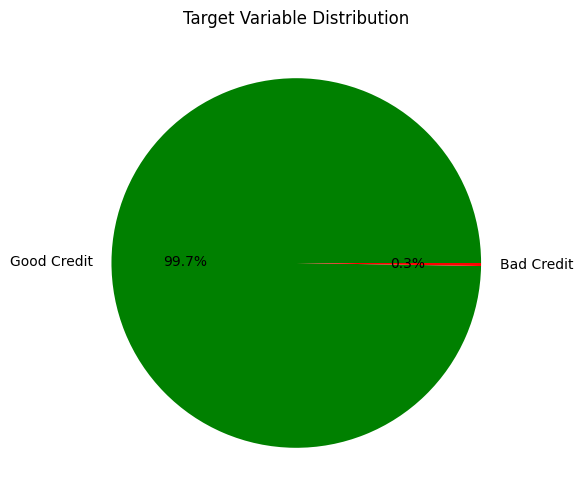

In [14]:
# Checking Class Distribution
print(merged_df['Bad_Credit'].value_counts())

merged_df['Bad_Credit'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['green', 'red'],
    labels=['Good Credit', 'Bad Credit'],
    figsize=(6, 6)
)
plt.title("Target Variable Distribution")
plt.ylabel("")
plt.show()




**#Findings :**\
1.Since bad credit cases make up only 0.3% of the dataset, this indicates a severe class imbalance problem.\
2.If left unaddressed, machine learning models will likely favor the majority class (good credit) and fail to accurately predict bad credit cases.\
3.Hence we can handle this class imbalance further.

#📌 Step 4: Feature Engineering





In [15]:
# Convert DAYS_BIRTH to Age in Years
merged_df['AGE'] = (-merged_df['DAYS_BIRTH']) // 365

In [16]:
# calculate employement tenure as variable

merged_df['Employment_Tenure_Years'] = (-merged_df['DAYS_EMPLOYED']) // 365


In [17]:
#EMPLOYMENT_YEARS
merged_df['EMPLOYMENT_YEARS'] = merged_df['DAYS_EMPLOYED'].apply(lambda x: -x // 365 if x != 365243 else np.nan)


In [18]:
#YEARS_BEFORE_EMPLOYMENT(The difference between Age and Employment Duration)
merged_df['YEARS_BEFORE_EMPLOYMENT'] = merged_df['AGE'] - merged_df['Employment_Tenure_Years']

In [19]:
#EMPLOYMENT_STATUS
merged_df['EMPLOYMENT_STATUS'] = merged_df['DAYS_EMPLOYED'].apply(lambda x:
    'Unemployed' if x == 365243 else
    'Short-term' if x > -365*2 else
    'Mid-term' if x > -365*5 else
    'Long-term'
)


In [20]:
 # Employment stability ratio
merged_df['EMPLOYMENT_STABILITY'] = merged_df['Employment_Tenure_Years'] / merged_df['AGE']


In [21]:
# Debt-to-Income Ratio
merged_df['INCOME_PER_FAMILY_MEMBER'] = merged_df['AMT_INCOME_TOTAL'] / merged_df['CNT_FAM_MEMBERS']


In [22]:
# Max Delinquency Level
merged_df['MAX_DELINQUENCY'] = merged_df.groupby('ID')['STATUS'].transform(lambda x: max(x))


In [23]:
#Credit History Length
merged_df['CREDIT_HISTORY_LENGTH'] = merged_df.groupby('ID')['MONTHS_BALANCE'].transform(lambda x: abs(min(x)))


In [24]:

#INCOME PER CHILD
merged_df['INCOME_PER_CHILD'] = merged_df['AMT_INCOME_TOTAL'] / (merged_df['CNT_CHILDREN'] + 1)
#Note:  Why +1? To avoid division by zero when there are no children.

In [25]:
#INCOME PER FAMILY MEMBER
merged_df['INCOME_PER_FAMILY_MEMBER'] = merged_df['AMT_INCOME_TOTAL'] / merged_df['CNT_FAM_MEMBERS']


In [26]:
#INCOME TO AGE RATIO
merged_df['INCOME_TO_AGE_RATIO'] = merged_df['AMT_INCOME_TOTAL'] / merged_df['AGE']
#Higher values indicate higher earnings relative to the applicant's age.

In [27]:
 #INCOME TO EMPLOYMENT RATIO
merged_df['INCOME_TO_EMPLOYMENT_RATIO'] = merged_df['AMT_INCOME_TOTAL'] / (merged_df['Employment_Tenure_Years'] + 1)


In [28]:
#INCOME_PER_YEAR
merged_df['INCOME_PER_YEAR'] = merged_df['AMT_INCOME_TOTAL'] / merged_df['AGE']


In [29]:
#HOUSE_OWNERSHIP_IMPACT
merged_df['HOUSE_OWNERSHIP_IMPACT'] = merged_df['AMT_INCOME_TOTAL'] * merged_df['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y' else 0)


In [30]:
#CAR_OWNERSHIP_IMPACT
merged_df['CAR_OWNERSHIP_IMPACT'] = merged_df['AMT_INCOME_TOTAL'] * merged_df['FLAG_OWN_CAR'].apply(lambda x: 1 if x == 'Y' else 0)


In [31]:
#EMPLOYMENT_GAP_RATIO
merged_df['EMPLOYMENT_GAP_RATIO'] = merged_df['YEARS_BEFORE_EMPLOYMENT'] / merged_df['AGE']
#Proportion of life spent unemployed

In [32]:
#EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO
merged_df['EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO'] = merged_df['YEARS_BEFORE_EMPLOYMENT'] / (merged_df['Employment_Tenure_Years'] + 1)
#Years before employment compared to total work years

In [33]:
#LONG_TERM_EMPLOYMENT
merged_df['LONG_TERM_EMPLOYMENT'] = merged_df['Employment_Tenure_Years'].apply(lambda x: 1 if x >= 10 else 0)
#Indicator for long-term employment

In [34]:
#UNEMPLOYMENT_INDICATOR
merged_df['UNEMPLOYMENT_INDICATOR'] = merged_df['Employment_Tenure_Years'].apply(lambda x: 1 if pd.isna(x) else 0)
#Indicator for unemployment


In [35]:
#EMPLOYMENT_INCOME_RATIO
merged_df['EMPLOYMENT_INCOME_RATIO'] = merged_df['AMT_INCOME_TOTAL'] / (merged_df['Employment_Tenure_Years'] + 1)


In [36]:
merged_df['FREQUENT_JOB_CHANGER'] = (merged_df['EMPLOYMENT_GAP_RATIO'] > 0.5).astype(int)


In [37]:
merged_df['EMPLOYMENT_SECURE_SCORE'] = merged_df['LONG_TERM_EMPLOYMENT'] * 100


In [38]:


# UNEMPLOYMENT HISTORY (Adjusted for missing values)
merged_df['UNEMPLOYMENT_HISTORY'] = merged_df['UNEMPLOYMENT_INDICATOR'] * merged_df['EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO'].fillna(0)

# EMPLOYMENT TENURE RATIO (Avoid division by zero)
merged_df['EMPLOYMENT_TENURE_RATIO'] = merged_df['EMPLOYMENT_YEARS'] / (
    merged_df['EMPLOYMENT_YEARS'] + merged_df['EMPLOYMENT_GAP_RATIO'] + 1
)

# EXPENSE & SAVINGS ESTIMATES
merged_df['ANNUAL_EXPENSES_ESTIMATE'] = merged_df['AMT_INCOME_TOTAL'] * 0.6
merged_df['SAVINGS_ESTIMATE'] = merged_df['AMT_INCOME_TOTAL'] - merged_df['ANNUAL_EXPENSES_ESTIMATE']

# EXPENSE RATIO (Avoid division by zero)
merged_df['EXPENSE_RATIO'] = merged_df['ANNUAL_EXPENSES_ESTIMATE'] / np.where(merged_df['AMT_INCOME_TOTAL'] == 0, 1, merged_df['AMT_INCOME_TOTAL'])

# WEALTH INDEX & DISPOSABLE INCOME RATIO (Avoid division by zero)
merged_df['WEALTH_INDEX'] = merged_df['SAVINGS_ESTIMATE'] / np.where(merged_df['AMT_INCOME_TOTAL'] == 0, 1, merged_df['AMT_INCOME_TOTAL'])
merged_df['DISPOSABLE_INCOME_RATIO'] = merged_df['SAVINGS_ESTIMATE'] / np.where(merged_df['AMT_INCOME_TOTAL'] == 0, 1, merged_df['AMT_INCOME_TOTAL'])

# INCOME PER WORKING YEAR (Avoid division by zero)
merged_df['INCOME_PER_WORKING_YEAR'] = merged_df['AMT_INCOME_TOTAL'] / (merged_df['EMPLOYMENT_YEARS'] + 1)

# INCOME STABILITY SCORE (Binary indicator for high-income individuals)
merged_df['INCOME_STABILITY_SCORE'] = (merged_df['AMT_INCOME_TOTAL'] > 300000).astype(int)

# HOUSING & OWNERSHIP FEATURES
merged_df['RENT_OR_OWN_INDICATOR'] = (merged_df['NAME_HOUSING_TYPE'] == 'Rented apartment').astype(int)
merged_df['MULTIPLE_PROPERTY_OWNER'] = ((merged_df['FLAG_OWN_REALTY'] == 'Y') & (merged_df['FLAG_OWN_CAR'] == 'Y')).astype(int)
merged_df['CAR_LUXURY_SCORE'] = ((merged_df['FLAG_OWN_CAR'] == 'Y') & (merged_df['AMT_INCOME_TOTAL'] > 500000)).astype(int)

# CREDIT ACTIVITY FEATURES
merged_df['TOTAL_MONTHS'] = merged_df.groupby('ID')['MONTHS_BALANCE'].transform('count')
merged_df['MONTHS_SINCE_FIRST'] = merged_df.groupby('ID')['MONTHS_BALANCE'].transform('min').abs()
merged_df['MONTHS_SINCE_LAST'] = merged_df.groupby('ID')['MONTHS_BALANCE'].transform('max').abs()

# REPAYMENT BEHAVIOR FEATURES
merged_df['TOTAL_ON_TIME_PAYMENTS'] = merged_df.groupby('ID')['STATUS'].transform(lambda x: (x == '0').sum())
merged_df['TOTAL_LATE_PAYMENTS'] = merged_df.groupby('ID')['STATUS'].transform(lambda x: (x.isin(['1', '2', '3', '4', '5'])).sum())
merged_df['TOTAL_MISSED_PAYMENTS'] = merged_df.groupby('ID')['STATUS'].transform(lambda x: (x == 'X').sum())
merged_df['TOTAL_CLOSED_CREDITS'] = merged_df.groupby('ID')['STATUS'].transform(lambda x: (x == 'C').sum())

# CREDIT HEALTH RATIOS (Avoid division by zero)
merged_df['LATE_PAYMENT_RATIO'] = merged_df['TOTAL_LATE_PAYMENTS'] / np.where(merged_df['TOTAL_MONTHS'] == 0, 1, merged_df['TOTAL_MONTHS'])
merged_df['ON_TIME_PAYMENT_RATIO'] = merged_df['TOTAL_ON_TIME_PAYMENTS'] / np.where(merged_df['TOTAL_MONTHS'] == 0, 1, merged_df['TOTAL_MONTHS'])
merged_df['MISSED_PAYMENT_RATIO'] = merged_df['TOTAL_MISSED_PAYMENTS'] / np.where(merged_df['TOTAL_MONTHS'] == 0, 1, merged_df['TOTAL_MONTHS'])
merged_df['CREDIT_CLOSURE_RATIO'] = merged_df['TOTAL_CLOSED_CREDITS'] / np.where(merged_df['TOTAL_MONTHS'] == 0, 1, merged_df['TOTAL_MONTHS'])
merged_df['BAD_CREDIT_RATIO'] = merged_df['TOTAL_LATE_PAYMENTS'] / (merged_df['TOTAL_ON_TIME_PAYMENTS'] + 1)
merged_df['LOAN_BURDEN_SCORE'] = merged_df['TOTAL_LATE_PAYMENTS'] / (merged_df['TOTAL_CLOSED_CREDITS'] + 1)
merged_df['CREDIT_AGE_IMPACT'] = merged_df['CREDIT_HISTORY_LENGTH'] / merged_df['AGE']


#📌 Step 5: Data Preprocessing & Cleaning


In [39]:
# Check for missing values
missing_summary = merged_df.isnull().sum().sort_values(ascending=False)
print("Missing Values Summary:")
print(missing_summary)

Missing Values Summary:
EMPLOYMENT_YEARS           127972
EMPLOYMENT_TENURE_RATIO    127972
INCOME_PER_WORKING_YEAR    127972
CODE_GENDER                     0
ID                              0
                            ...  
MISSED_PAYMENT_RATIO            0
CREDIT_CLOSURE_RATIO            0
BAD_CREDIT_RATIO                0
LOAN_BURDEN_SCORE               0
CREDIT_AGE_IMPACT               0
Length: 69, dtype: int64


In [40]:

# Iterate through columns and impute missing values based on data type
for col in merged_df.columns:
    if merged_df[col].dtype in ['float64', 'int64']:
        merged_df[col].fillna(merged_df[col].median(), inplace=True)
    elif merged_df[col].dtype == 'object':
        merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)


<ipython-input-40-8b753f0725e8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(merged_df[col].median(), inplace=True)
<ipython-input-40-8b753f0725e8>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [41]:
!pip install optbinning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.9/213.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 23.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [42]:
# prompt: PRINT ALL THE CATEGORICAL VARIABLES AND NAMED IT AS CATEGEGORICAL_VARS

categorical_vars = merged_df.select_dtypes(include=['object']).columns
categorical_vars


Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'STATUS', 'EMPLOYMENT_STATUS', 'MAX_DELINQUENCY'],
      dtype='object')

In [43]:
# prompt: change dtype of categorical_vars to str

for col in categorical_vars:
    merged_df[col] = merged_df[col].astype(str)


In [44]:

Continous_vars = merged_df.select_dtypes(include=['number']).columns
Continous_vars


Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'Bad_Credit', 'AGE',
       'Employment_Tenure_Years', 'EMPLOYMENT_YEARS',
       'YEARS_BEFORE_EMPLOYMENT', 'EMPLOYMENT_STABILITY',
       'INCOME_PER_FAMILY_MEMBER', 'CREDIT_HISTORY_LENGTH', 'INCOME_PER_CHILD',
       'INCOME_TO_AGE_RATIO', 'INCOME_TO_EMPLOYMENT_RATIO', 'INCOME_PER_YEAR',
       'HOUSE_OWNERSHIP_IMPACT', 'CAR_OWNERSHIP_IMPACT',
       'EMPLOYMENT_GAP_RATIO', 'EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO',
       'LONG_TERM_EMPLOYMENT', 'UNEMPLOYMENT_INDICATOR',
       'EMPLOYMENT_INCOME_RATIO', 'FREQUENT_JOB_CHANGER',
       'EMPLOYMENT_SECURE_SCORE', 'UNEMPLOYMENT_HISTORY',
       'EMPLOYMENT_TENURE_RATIO', 'ANNUAL_EXPENSES_ESTIMATE',
       'SAVINGS_ESTIMATE', 'EXPENSE_RATIO', 'WEALTH_INDEX',
       'DISPOSABLE_INCOME_RATIO', 'INCOME_PER_WORKING_YEAR',
       'INCOME_STABILITY_SCORE', '

In [45]:
print(merged_df["Bad_Credit"].value_counts())


Bad_Credit
0    775688
1      2027
Name: count, dtype: int64


**Undersampling**

In [46]:
# 1. Split the majority and minority class
majority = merged_df[merged_df["Bad_Credit"] == 0]
minority = merged_df[merged_df["Bad_Credit"] == 1]

# 2. Downsample the majority class to balance
from sklearn.utils import resample

majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=len(minority) * 10,  # You can try 5x or 10x of minority size
    random_state=42
)

# 3. Combine the downsampled majority and full minority
balanced_df = pd.concat([majority_downsampled, minority])

# 4. Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [47]:
#Varifying undersampling
print(balanced_df["Bad_Credit"].value_counts())


Bad_Credit
0    20270
1     2027
Name: count, dtype: int64


In [48]:
#chek null values for each column
null_summary = balanced_df.isnull().sum()
print(null_summary[null_summary > 0])


Series([], dtype: int64)


In [49]:
#Ensure Categorical Variables Are Strings
for col in categorical_vars:
    balanced_df[col] = balanced_df[col].astype(str)


In [50]:
from optbinning import OptimalBinning

binning_results = {}
successfully_binned = []

# Change this line
# for col in Continous_vars + categorical_vars:
# To this line
for col in Continous_vars.union(categorical_vars):  # Use union for combining Index objects
    try:
        dtype = "numerical" if col in Continous_vars else "categorical"
        optb = OptimalBinning(
            name=col,
            dtype=dtype,
            solver="cp",
            min_samples_leaf=50,
            max_n_bins=10,
            monotonic_trend="auto",
        )
        optb.fit(balanced_df[col], balanced_df["Bad_Credit"])

        # Check if it's built successfully
        if optb.status == "OPTIMAL":
            binning_results[col] = optb
            successfully_binned.append(col)
            print(f"✅ Successfully binned: {col}")
        else:
            print(f"⚠️ Not optimal binning for: {col} → Status: {optb.status}")

    except Exception as e:
        print(f"❌ Binning failed for {col}: {e}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: AGE


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: AMT_INCOME_TOTAL


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: ANNUAL_EXPENSES_ESTIMATE
✅ Successfully binned: BAD_CREDIT_RATIO
✅ Successfully binned: Bad_Credit
✅ Successfully binned: CAR_LUXURY_SCORE


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: CAR_OWNERSHIP_IMPACT
✅ Successfully binned: CNT_CHILDREN
✅ Successfully binned: CNT_FAM_MEMBERS
✅ Successfully binned: CODE_GENDER


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: CREDIT_AGE_IMPACT


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: CREDIT_CLOSURE_RATIO


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: CREDIT_HISTORY_LENGTH


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: DAYS_BIRTH


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: DAYS_EMPLOYED
✅ Successfully binned: DISPOSABLE_INCOME_RATIO


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: EMPLOYMENT_GAP_RATIO


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: EMPLOYMENT_INCOME_RATIO
✅ Successfully binned: EMPLOYMENT_SECURE_SCORE


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: EMPLOYMENT_STABILITY
✅ Successfully binned: EMPLOYMENT_STATUS


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: EMPLOYMENT_TENURE_RATIO


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: EMPLOYMENT_YEARS
✅ Successfully binned: EXPENSE_RATIO


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: Employment_Tenure_Years
✅ Successfully binned: FLAG_EMAIL
✅ Successfully binned: FLAG_MOBIL
✅ Successfully binned: FLAG_OWN_CAR
✅ Successfully binned: FLAG_OWN_REALTY
✅ Successfully binned: FLAG_PHONE
✅ Successfully binned: FLAG_WORK_PHONE
✅ Successfully binned: FREQUENT_JOB_CHANGER


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: HOUSE_OWNERSHIP_IMPACT


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: ID


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: INCOME_PER_CHILD


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: INCOME_PER_FAMILY_MEMBER


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: INCOME_PER_WORKING_YEAR


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: INCOME_PER_YEAR
✅ Successfully binned: INCOME_STABILITY_SCORE


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: INCOME_TO_AGE_RATIO


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: INCOME_TO_EMPLOYMENT_RATIO
✅ Successfully binned: LATE_PAYMENT_RATIO


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: LOAN_BURDEN_SCORE
✅ Successfully binned: LONG_TERM_EMPLOYMENT
✅ Successfully binned: MAX_DELINQUENCY


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: MISSED_PAYMENT_RATIO
✅ Successfully binned: MONTHS_BALANCE


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: MONTHS_SINCE_FIRST


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: MONTHS_SINCE_LAST
✅ Successfully binned: MULTIPLE_PROPERTY_OWNER
✅ Successfully binned: NAME_EDUCATION_TYPE
✅ Successfully binned: NAME_FAMILY_STATUS
✅ Successfully binned: NAME_HOUSING_TYPE
✅ Successfully binned: NAME_INCOME_TYPE
✅ Successfully binned: OCCUPATION_TYPE


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: ON_TIME_PAYMENT_RATIO
✅ Successfully binned: RENT_OR_OWN_INDICATOR


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: SAVINGS_ESTIMATE
✅ Successfully binned: STATUS


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: TOTAL_CLOSED_CREDITS
✅ Successfully binned: TOTAL_LATE_PAYMENTS


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: TOTAL_MISSED_PAYMENTS
✅ Successfully binned: TOTAL_MONTHS


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: TOTAL_ON_TIME_PAYMENTS
✅ Successfully binned: UNEMPLOYMENT_HISTORY
✅ Successfully binned: UNEMPLOYMENT_INDICATOR
✅ Successfully binned: WEALTH_INDEX


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

✅ Successfully binned: YEARS_BEFORE_EMPLOYMENT


In [51]:
print(optb.status)


OPTIMAL


In [52]:
# prompt: draw the binning table with woe ,iv values

import pandas as pd

for col in successfully_binned:
    binning_table = binning_results[col].binning_table.build()
    print(f"\nBinning Table for: {col}")
    display(binning_table)



Binning Table for: AGE


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 26.50)",815,0.036552,714,101,0.123926,-0.346823,0.005065,0.000630
1,"[26.50, 37.50)",6769,0.303583,6269,500,0.073866,0.226179,0.014160,0.001766
2,"[37.50, 41.50)",2636,0.118222,2521,115,0.043627,0.784894,0.053088,0.006471
3,"[41.50, 50.50)",4992,0.223887,4506,486,0.097356,-0.075629,0.001321,0.000165
4,"[50.50, 61.50)",5499,0.246625,4908,591,0.107474,-0.185779,0.009184,0.001146
5,"[61.50, 66.50)",1439,0.064538,1246,193,0.134121,-0.437582,0.014766,0.001831
6,"[66.50, inf)",147,0.006593,106,41,0.278912,-1.352718,0.020287,0.002359
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.117870,0.014368



Binning Table for: AMT_INCOME_TOTAL


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 112950.00)",5230,0.234561,4652,578,0.110516,-0.217106,0.012082,0.001507
1,"[112950.00, 130950.00)",951,0.042651,849,102,0.107256,-0.183499,0.001548,0.000193
2,"[130950.00, 137250.00)",2543,0.114051,2410,133,0.052300,0.594448,0.031673,0.003902
3,"[137250.00, 156375.00)",579,0.025968,573,6,0.010363,2.256541,0.057109,0.005928
4,"[156375.00, 303750.00)",10359,0.464592,9519,840,0.081089,0.125058,0.006904,0.000862
5,"[303750.00, 447750.00)",1966,0.088173,1758,208,0.105799,-0.168191,0.002672,0.000334
6,"[447750.00, inf)",669,0.030004,509,160,0.239163,-1.145311,0.061645,0.007310
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.173632,0.020037



Binning Table for: ANNUAL_EXPENSES_ESTIMATE


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 67770.00)",5230,0.234561,4652,578,0.110516,-0.217106,0.012082,0.001507
1,"[67770.00, 78570.00)",951,0.042651,849,102,0.107256,-0.183499,0.001548,0.000193
2,"[78570.00, 82350.00)",2543,0.114051,2410,133,0.052300,0.594448,0.031673,0.003902
3,"[82350.00, 93825.00)",579,0.025968,573,6,0.010363,2.256541,0.057109,0.005928
4,"[93825.00, 182250.00)",10359,0.464592,9519,840,0.081089,0.125058,0.006904,0.000862
5,"[182250.00, 268650.00)",1966,0.088173,1758,208,0.105799,-0.168191,0.002672,0.000334
6,"[268650.00, inf)",669,0.030004,509,160,0.239163,-1.145311,0.061645,0.007310
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.173632,0.020037



Binning Table for: BAD_CREDIT_RATIO


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.13)",18767,0.841683,18755,12,0.000639,5.051724,4.644246,0.304799
1,"[0.13, 0.20)",509,0.022828,482,27,0.053045,0.579522,0.006061,0.000747
2,"[0.20, 0.30)",328,0.014710,272,56,0.170732,-0.722135,0.010260,0.001255
3,"[0.30, 0.41)",270,0.012109,208,62,0.229630,-1.092181,0.022199,0.002645
4,"[0.41, 0.53)",197,0.008835,125,72,0.365482,-1.750937,0.051397,0.005712
5,"[0.53, 0.69)",143,0.006413,77,66,0.461538,-2.148434,0.061793,0.006514
6,"[0.69, 1.04)",299,0.013410,133,166,0.555184,-2.524224,0.190157,0.018966
7,"[1.04, 1.43)",240,0.010764,85,155,0.645833,-2.903359,0.209838,0.019714
8,"[1.43, 2.10)",225,0.010091,60,165,0.733333,-3.314186,0.259968,0.022826
9,"[2.10, inf)",1319,0.059156,73,1246,0.944655,-5.139819,3.140944,0.203226



Binning Table for: Bad_Credit


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",22297,1.0,20270,2027,0.090909,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,22297,1.0,20270,2027,0.090909,,0.0,0.0



Binning Table for: CAR_LUXURY_SCORE


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",22118,0.991972,20099,2019,0.091283,-0.004517,0.000020,0.000003
1,"[0.50, inf)",179,0.008028,171,8,0.044693,0.759637,0.003410,0.000416
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.003431,0.000419



Binning Table for: CAR_OWNERSHIP_IMPACT


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 312750.00)",20690,0.927928,18916,1774,0.085742,0.064186,0.003724,0.000465
1,"[312750.00, 447750.00)",1183,0.053056,1032,151,0.127642,-0.380611,0.008975,0.001115
2,"[447750.00, 461250.00)",218,0.009777,124,94,0.431193,-2.025598,0.081544,0.008744
3,"[461250.00, inf)",206,0.009239,198,8,0.038835,0.90624,0.005276,0.000638
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.099518,0.010963



Binning Table for: CNT_CHILDREN


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",15626,0.700812,14273,1353,0.086586,0.05346,0.001960,0.000245
1,"[0.50, 1.50)",4507,0.202135,3976,531,0.117817,-0.289316,0.019040,0.002372
2,"[1.50, 2.50)",1886,0.084585,1757,129,0.068399,0.308966,0.007118,0.000886
3,"[2.50, inf)",278,0.012468,264,14,0.050360,0.634307,0.003880,0.000477
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.031998,0.003980



Binning Table for: CNT_FAM_MEMBERS


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.50)",4174,0.187200,3812,362,0.086727,0.05168,0.000490,0.000061
1,"[1.50, 2.50)",12163,0.545499,11086,1077,0.088547,0.028919,0.000451,0.000056
2,"[2.50, 3.50)",3878,0.173925,3429,449,0.115781,-0.269584,0.014111,0.001759
3,"[3.50, 4.50)",1815,0.081401,1690,125,0.068871,0.301585,0.006546,0.000815
4,"[4.50, inf)",267,0.011975,253,14,0.052434,0.591747,0.003299,0.000406
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.024897,0.003098


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: CODE_GENDER


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[F],14590,0.654348,13475,1115,0.076422,0.189397,0.021724,0.002711
1,[M],7707,0.345652,6795,912,0.118334,-0.294283,0.033755,0.004204
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.055479,0.006916


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: CREDIT_AGE_IMPACT


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.81)",10726,0.481051,9998,728,0.067872,0.317254,0.042541,0.005295
1,"[0.81, 0.88)",1436,0.064403,1303,133,0.092618,-0.02051,0.000027,0.000003
2,"[0.88, 1.13)",4709,0.211194,4182,527,0.111913,-0.231241,0.012412,0.001548
3,"[1.13, 2.11)",5346,0.239763,4730,616,0.115226,-0.264152,0.018635,0.002323
4,"[2.11, inf)",80,0.003588,57,23,0.287500,-1.395028,0.011906,0.001378
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.085521,0.010548


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: CREDIT_CLOSURE_RATIO


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.07)",8488,0.380679,7303,1185,0.139609,-0.484043,0.108581,0.013442
1,"[0.07, 0.08)",59,0.002646,17,42,0.711864,-3.207041,0.063761,0.005699
2,"[0.08, 0.18)",602,0.026999,449,153,0.254153,-1.226,0.065383,0.007697
3,"[0.18, 0.23)",357,0.016011,282,75,0.210084,-0.978166,0.022584,0.002716
4,"[0.23, 0.32)",724,0.032471,593,131,0.180939,-0.792588,0.028036,0.003416
5,"[0.32, 0.55)",2532,0.113558,2268,264,0.104265,-0.151881,0.002787,0.000348
6,"[0.55, inf)",9535,0.427636,9358,177,0.018563,1.665252,0.623381,0.070008
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.914513,0.103324


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: CREDIT_HISTORY_LENGTH


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 22.50)",5241,0.235054,4896,345,0.065827,0.350044,0.024971,0.003106
1,"[22.50, 26.50)",1561,0.070009,1481,80,0.051249,0.615861,0.020691,0.002546
2,"[26.50, 28.50)",852,0.038211,837,15,0.017606,1.719189,0.058268,0.006501
3,"[28.50, 51.50)",10791,0.483966,9871,920,0.085256,0.070398,0.002330,0.000291
4,"[51.50, 54.50)",1301,0.058349,1163,138,0.106072,-0.171081,0.001831,0.000229
5,"[54.50, 58.50)",1653,0.074136,1346,307,0.185723,-0.82454,0.070129,0.008526
6,"[58.50, inf)",898,0.040274,676,222,0.247216,-1.189069,0.090573,0.010699
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.268793,0.031897


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: DAYS_BIRTH


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -24595.50)",124,0.005561,83,41,0.330645,-1.597317,0.025768,0.002917
1,"[-24595.50, -22653.00)",1447,0.064897,1254,193,0.133379,-0.431182,0.014380,0.001784
2,"[-22653.00, -18660.00)",5454,0.244607,4863,591,0.108361,-0.19499,0.010072,0.001257
3,"[-18660.00, -15451.00)",4857,0.217832,4372,485,0.099856,-0.103758,0.002447,0.000306
4,"[-15451.00, -13722.00)",3119,0.139884,3002,117,0.037512,0.942275,0.085163,0.010268
5,"[-13722.00, inf)",7296,0.327219,6696,600,0.082237,0.109751,0.003768,0.000471
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.141598,0.017002


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: DAYS_EMPLOYED


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -1460.00)",11778,0.528232,11124,654,0.055527,0.531168,0.120122,0.014841
1,"[-1460.00, -931.50)",2245,0.100686,2000,245,0.109131,-0.202941,0.004505,0.000562
2,"[-931.50, inf)",8274,0.371081,7146,1128,0.136331,-0.456478,0.093097,0.011537
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.217725,0.026941



Binning Table for: DISPOSABLE_INCOME_RATIO


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",22297,1.0,20270,2027,0.090909,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,22297,1.0,20270,2027,0.090909,,0.0,0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: EMPLOYMENT_GAP_RATIO


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.92)",12064,0.541059,11395,669,0.055454,0.532561,0.123616,0.015272
1,"[0.92, 0.94)",1443,0.064717,1264,179,0.124047,-0.347934,0.009029,0.001123
2,"[0.94, 0.95)",936,0.041979,819,117,0.125000,-0.356675,0.006176,0.000768
3,"[0.95, inf)",7854,0.352245,6792,1062,0.135218,-0.446994,0.084415,0.010465
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.223236,0.027628


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -1.07)",144,0.006458,103,41,0.284722,-1.381428,0.020922,0.002425
1,"[-1.07, -1.06)",1257,0.056375,1064,193,0.153540,-0.595485,0.025441,0.003134
2,"[-1.06, 4.76)",10726,0.481051,10174,552,0.051464,0.611458,0.140391,0.017280
3,"[4.76, 11.90)",5498,0.246580,5043,455,0.082757,0.102874,0.002502,0.000313
4,"[11.90, inf)",4672,0.209535,3886,786,0.168236,-0.704406,0.138101,0.016914
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.327358,0.040067


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: EMPLOYMENT_INCOME_RATIO


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -177.75)",1135,0.050904,972,163,0.143612,-0.516979,0.016782,0.002075
1,"[-177.75, -161.55)",87,0.003902,78,9,0.103448,-0.143101,0.000085,0.000011
2,"[-161.55, 33875.00)",12894,0.578284,12086,808,0.062665,0.402656,0.079578,0.009881
3,"[33875.00, 156375.00)",6886,0.308831,6148,738,0.107174,-0.182647,0.011101,0.001386
4,"[156375.00, inf)",1295,0.058080,986,309,0.238610,-1.14227,0.118566,0.014064
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.226112,0.027416



Binning Table for: EMPLOYMENT_SECURE_SCORE


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 50.00)",17677,0.792797,15960,1717,0.097132,-0.073078,0.004362,0.000545
1,"[50.00, inf)",4620,0.207203,4310,310,0.067100,0.329536,0.019671,0.002448
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.024034,0.002993


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: EMPLOYMENT_STABILITY


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.05)",7854,0.352245,6792,1062,0.135218,-0.446994,0.084415,0.010465
1,"[0.05, 0.06)",936,0.041979,819,117,0.125000,-0.356675,0.006176,0.000768
2,"[0.06, 0.08)",1443,0.064717,1264,179,0.124047,-0.347934,0.009029,0.001123
3,"[0.08, inf)",12064,0.541059,11395,669,0.055454,0.532561,0.123616,0.015272
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.223236,0.027628


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: EMPLOYMENT_STATUS


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[Long-term],10200,0.457461,9614,586,0.057451,0.495071,0.091687,0.011345
1,[Unemployed],3687,0.165359,3311,376,0.101980,-0.127169,0.002817,0.000352
2,[Mid-term],4917,0.220523,4340,577,0.117348,-0.284798,0.020092,0.002503
3,[Short-term],3493,0.156658,3005,488,0.139708,-0.484868,0.044851,0.005552
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.159447,0.019752


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: EMPLOYMENT_TENURE_RATIO


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.51)",4416,0.198054,3692,724,0.163949,-0.673453,0.117879,0.014463
1,"[0.51, 0.61)",1195,0.053595,1030,165,0.138075,-0.471216,0.014413,0.001785
2,"[0.61, 0.61)",538,0.024129,474,64,0.118959,-0.300261,0.002459,0.000306
3,"[0.61, 0.76)",7735,0.346908,7090,645,0.083387,0.094605,0.002987,0.000373
4,"[0.76, 0.76)",57,0.002556,53,4,0.070175,0.281412,0.000180,0.000022
5,"[0.76, 0.84)",3346,0.150065,3264,82,0.024507,1.381404,0.166559,0.019308
6,"[0.84, inf)",5010,0.224694,4667,343,0.068463,0.307956,0.018793,0.002340
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.323271,0.038598



Binning Table for: EMPLOYMENT_YEARS


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.50)",5260,0.235906,4446,814,0.154753,-0.604785,0.110216,0.013571
1,"[2.50, 3.50)",1572,0.070503,1389,183,0.116412,-0.275732,0.005999,0.000747
2,"[3.50, 6.50)",7896,0.354128,7282,614,0.077761,0.170581,0.009610,0.001200
3,"[6.50, 11.50)",4181,0.187514,3926,255,0.060990,0.431528,0.029294,0.003634
4,"[11.50, 12.50)",462,0.020720,460,2,0.004329,3.135494,0.068062,0.006156
5,"[12.50, 19.50)",1752,0.078576,1668,84,0.047945,0.685979,0.028021,0.003436
6,"[19.50, 27.50)",863,0.038705,815,48,0.055620,0.529402,0.008749,0.001081
7,"[27.50, inf)",311,0.013948,284,27,0.086817,0.050552,0.000035,0.000004
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: EXPENSE_RATIO


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",22297,1.0,20270,2027,0.090909,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,22297,1.0,20270,2027,0.090909,,0.0,0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: Employment_Tenure_Years


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.50)",8947,0.401265,7757,1190,0.133005,-0.427943,0.087468,0.010851
1,"[2.50, 3.50)",1572,0.070503,1389,183,0.116412,-0.275732,0.005999,0.000747
2,"[3.50, 11.50)",8390,0.376284,7897,493,0.058760,0.471144,0.068963,0.008542
3,"[11.50, 12.50)",462,0.020720,460,2,0.004329,3.135494,0.068062,0.006156
4,"[12.50, 17.50)",1431,0.064179,1367,64,0.044724,0.758906,0.027219,0.003323
5,"[17.50, 27.50)",1184,0.053101,1116,68,0.057432,0.495413,0.010656,0.001319
6,"[27.50, inf)",311,0.013948,284,27,0.086817,0.050552,0.000035,0.000004
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.268402,0.030942


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: FLAG_EMAIL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",20403,0.915056,18532,1871,0.091702,-0.009559,0.000084,0.000010
1,"[0.50, inf)",1894,0.084944,1738,156,0.082365,0.108049,0.000949,0.000119
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.001033,0.000129


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: FLAG_MOBIL


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",22297,1.0,20270,2027,0.090909,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,22297,1.0,20270,2027,0.090909,,0.0,0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: FLAG_OWN_CAR


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[N],13571,0.608647,12358,1213,0.089382,0.018622,0.000209,0.000026
1,[Y],8726,0.391353,7912,814,0.093284,-0.02841,0.000320,0.000040
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.000529,0.000066



Binning Table for: FLAG_OWN_REALTY


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[N],7545,0.338386,6888,657,0.087078,0.047267,0.000742,0.000093
1,[Y],14752,0.661614,13382,1370,0.092869,-0.023485,0.000368,0.000046
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.001110,0.000139


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: FLAG_PHONE


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",15410,0.691124,14164,1246,0.080857,0.12818,0.010775,0.001346
1,"[0.50, inf)",6887,0.308876,6106,781,0.113402,-0.246133,0.020691,0.002580
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.031467,0.003926


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: FLAG_WORK_PHONE


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",17073,0.765708,15614,1459,0.085457,0.067832,0.003427,0.000428
1,"[0.50, inf)",5224,0.234292,4656,568,0.108729,-0.198795,0.010043,0.001253
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.013469,0.001682


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: FREQUENT_JOB_CHANGER


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",730,0.03274,696,34,0.046575,0.716404,0.012582,0.00154
1,"[0.50, inf)",21567,0.96726,19574,1993,0.092410,-0.018024,0.000317,0.00004
2,Special,0,0.00000,0,0,0.000000,0.0,0.000000,0.00000
3,Missing,0,0.00000,0,0,0.000000,0.0,0.000000,0.00000
Totals,,22297,1.00000,20270,2027,0.090909,,0.012899,0.00158


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: HOUSE_OWNERSHIP_IMPACT


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 96750.00)",9286,0.416469,8486,800,0.086151,0.058976,0.001414,0.000177
1,"[96750.00, 447750.00)",12512,0.561152,11396,1116,0.089194,0.020926,0.000244,0.000030
2,"[447750.00, 573750.00)",302,0.013544,234,68,0.225166,-1.066772,0.023472,0.002802
3,"[573750.00, 596250.00)",52,0.002332,16,36,0.692308,-3.113515,0.052839,0.004797
4,"[596250.00, inf)",145,0.006503,138,7,0.048276,0.678758,0.002277,0.000279
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.080246,0.008085



Binning Table for: ID


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 5009743.00)",438,0.019644,424,14,0.031963,1.108091,0.015525,0.001847
1,"[5009743.00, 5113618.00)",15335,0.687761,14216,1119,0.072970,0.239348,0.035731,0.004456
2,"[5113618.00, 5135341.00)",3284,0.147284,2834,450,0.137028,-0.462388,0.038004,0.004709
3,"[5135341.00, 5135361.50)",106,0.004754,1,105,0.990566,-6.956545,0.360011,0.017774
4,"[5135361.50, 5142363.50)",1224,0.054895,1000,224,0.183007,-0.806476,0.049335,0.006005
5,"[5142363.50, 5142460.50)",54,0.002422,45,9,0.166667,-0.693147,0.001539,0.000189
6,"[5142460.50, inf)",1856,0.083240,1750,106,0.057112,0.501347,0.017066,0.002111
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.517211,0.037090



Binning Table for: INCOME_PER_CHILD


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 36450.00)",518,0.023232,480,38,0.073359,0.233615,1.152515e-03,1.437377e-04
1,"[36450.00, 53325.00)",1113,0.049917,1093,20,0.017969,1.698364,7.482186e-02,8.369319e-03
2,"[53325.00, 290250.00)",18592,0.833834,16903,1689,0.090846,0.000769,4.934421e-07,6.168026e-08
3,"[290250.00, inf)",2074,0.093017,1794,280,0.135005,-0.445172,2.209387e-02,2.739152e-03
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,22297,1.000000,20270,2027,0.090909,,9.806874e-02,1.125227e-02



Binning Table for: INCOME_PER_FAMILY_MEMBER


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 36225.00)",1881,0.084361,1786,95,0.050505,0.631272,0.026036,0.003201
1,"[36225.00, 89775.00)",9810,0.439970,8935,875,0.089195,0.020922,0.000191,0.000024
2,"[89775.00, 149250.00)",6582,0.295197,5957,625,0.094956,-0.048014,0.000694,0.000087
3,"[149250.00, 150375.00)",74,0.003319,32,42,0.567568,-2.574519,0.049280,0.004877
4,"[150375.00, 154125.00)",108,0.004844,66,42,0.388889,-1.8506,0.032319,0.003547
5,"[154125.00, 159750.00)",758,0.033996,601,157,0.207124,-0.960236,0.045904,0.005527
6,"[159750.00, inf)",3084,0.138315,2893,191,0.061933,0.415191,0.020135,0.002499
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.174559,0.019763


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: INCOME_PER_WORKING_YEAR


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 20163.46)",6310,0.282998,5994,316,0.050079,0.640187,0.089506,0.011001
1,"[20163.46, 33875.00)",7806,0.350092,7142,664,0.085063,0.072881,0.001805,0.000226
2,"[33875.00, 156375.00)",6886,0.308831,6148,738,0.107174,-0.182647,0.011101,0.001386
3,"[156375.00, inf)",1295,0.058080,986,309,0.238610,-1.14227,0.118566,0.014064
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.220978,0.026677



Binning Table for: INCOME_PER_YEAR


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1328.71)",691,0.030991,586,105,0.151954,-0.583226,0.013351,0.001646
1,"[1328.71, 1482.11)",408,0.018298,356,52,0.127451,-0.378898,0.003066,0.000381
2,"[1482.11, 2049.29)",1931,0.086604,1709,222,0.114966,-0.261599,0.006595,0.000822
3,"[2049.29, 2558.58)",2086,0.093555,1863,223,0.106903,-0.179813,0.003256,0.000406
4,"[2558.58, 2904.74)",1451,0.065076,1299,152,0.104755,-0.157116,0.001713,0.000214
5,"[2904.74, 3839.85)",3694,0.165673,3348,346,0.093665,-0.032905,0.000182,0.000023
6,"[3839.85, 6281.04)",7325,0.328520,6761,564,0.076997,0.181287,0.010026,0.001252
7,"[6281.04, 8512.19)",2691,0.120689,2622,69,0.025641,1.335001,0.127243,0.014820
8,"[8512.19, 17216.35)",1854,0.083150,1640,214,0.115426,-0.26611,0.006564,0.000818
9,"[17216.35, inf)",166,0.007445,86,80,0.481928,-2.230264,0.078560,0.008186


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: INCOME_STABILITY_SCORE


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",19657,0.881598,17998,1659,0.084397,0.081461,0.005658,0.000707
1,"[0.50, inf)",2640,0.118402,2272,368,0.139394,-0.482252,0.033498,0.004147
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.039157,0.004854



Binning Table for: INCOME_TO_AGE_RATIO


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1328.71)",691,0.030991,586,105,0.151954,-0.583226,0.013351,0.001646
1,"[1328.71, 1482.11)",408,0.018298,356,52,0.127451,-0.378898,0.003066,0.000381
2,"[1482.11, 2049.29)",1931,0.086604,1709,222,0.114966,-0.261599,0.006595,0.000822
3,"[2049.29, 2558.58)",2086,0.093555,1863,223,0.106903,-0.179813,0.003256,0.000406
4,"[2558.58, 2904.74)",1451,0.065076,1299,152,0.104755,-0.157116,0.001713,0.000214
5,"[2904.74, 3839.85)",3694,0.165673,3348,346,0.093665,-0.032905,0.000182,0.000023
6,"[3839.85, 6281.04)",7325,0.328520,6761,564,0.076997,0.181287,0.010026,0.001252
7,"[6281.04, 8512.19)",2691,0.120689,2622,69,0.025641,1.335001,0.127243,0.014820
8,"[8512.19, 17216.35)",1854,0.083150,1640,214,0.115426,-0.26611,0.006564,0.000818
9,"[17216.35, inf)",166,0.007445,86,80,0.481928,-2.230264,0.078560,0.008186


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: INCOME_TO_EMPLOYMENT_RATIO


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -177.75)",1135,0.050904,972,163,0.143612,-0.516979,0.016782,0.002075
1,"[-177.75, -161.55)",87,0.003902,78,9,0.103448,-0.143101,0.000085,0.000011
2,"[-161.55, 33875.00)",12894,0.578284,12086,808,0.062665,0.402656,0.079578,0.009881
3,"[33875.00, 156375.00)",6886,0.308831,6148,738,0.107174,-0.182647,0.011101,0.001386
4,"[156375.00, inf)",1295,0.058080,986,309,0.238610,-1.14227,0.118566,0.014064
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.226112,0.027416


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: LATE_PAYMENT_RATIO


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.06)",18984,0.851415,18959,25,0.001317,4.328573,3.995228,0.295532
1,"[0.06, 0.10)",478,0.021438,444,34,0.071130,0.266879,0.001369,0.000171
2,"[0.10, 0.15)",408,0.018298,315,93,0.227941,-1.082612,0.032847,0.003916
3,"[0.15, 0.17)",163,0.007310,104,59,0.361963,-1.735732,0.041616,0.004634
4,"[0.17, 0.26)",446,0.020003,228,218,0.488789,-2.257735,0.217420,0.022566
5,"[0.26, 0.31)",173,0.007759,70,103,0.595376,-2.688819,0.127344,0.012381
6,"[0.31, 0.37)",113,0.005068,40,73,0.646018,-2.904165,0.098859,0.009287
7,"[0.37, 0.42)",152,0.006817,32,120,0.789474,-3.624341,0.208842,0.017404
8,"[0.42, 0.61)",556,0.024936,59,497,0.893885,-4.433638,1.074178,0.078069
9,"[0.61, inf)",824,0.036956,19,805,0.976942,-6.048988,2.396617,0.134658


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: LOAN_BURDEN_SCORE


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.06)",18151,0.814056,18146,5,0.000275,5.894182,5.262019,0.302608
1,"[0.06, 0.17)",649,0.029107,608,41,0.063174,0.394018,0.003849,0.000478
2,"[0.17, 0.20)",119,0.005337,90,29,0.243697,-1.170071,0.011545,0.001366
3,"[0.20, 1.09)",1267,0.056824,858,409,0.322810,-1.561696,0.249008,0.028305
4,"[1.09, 3.08)",638,0.028614,345,293,0.459248,-2.139213,0.272810,0.028798
5,"[3.08, 6.25)",305,0.013679,124,181,0.593443,-2.680801,0.222981,0.021706
6,"[6.25, 14.50)",380,0.017043,71,309,0.813158,-3.773246,0.561985,0.045667
7,"[14.50, inf)",788,0.035341,28,760,0.964467,-5.603699,2.093301,0.125860
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: LONG_TERM_EMPLOYMENT


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",17677,0.792797,15960,1717,0.097132,-0.073078,0.004362,0.000545
1,"[0.50, inf)",4620,0.207203,4310,310,0.067100,0.329536,0.019671,0.002448
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.024034,0.002993


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: MAX_DELINQUENCY


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[0, 1, 2, C]",10104,0.453155,9597,507,0.050178,0.63811,0.142512,0.017518
1,[X],11608,0.520608,10643,965,0.083132,0.097944,0.004798,0.000600
2,"[3, 4, 5]",585,0.026237,30,555,0.948718,-5.220356,1.421626,0.090801
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,1.568937,0.108918


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: MISSED_PAYMENT_RATIO


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.10)",15207,0.682020,13837,1370,0.090090,0.00995,0.000067,8.406449e-06
1,"[0.10, 0.17)",1302,0.058394,1088,214,0.164363,-0.676465,0.035108,4.306704e-03
2,"[0.17, 0.17)",97,0.004350,1,96,0.989691,-6.866933,0.324884,1.623698e-02
3,"[0.17, 0.32)",1225,0.054940,1078,147,0.120000,-0.310155,0.005998,7.467671e-04
4,"[0.32, 0.52)",1260,0.056510,1134,126,0.100000,-0.105361,0.000655,8.182837e-05
5,"[0.52, 0.56)",185,0.008297,168,17,0.091892,-0.011834,0.000001,1.459594e-07
6,"[0.56, 0.88)",959,0.043010,904,55,0.057351,0.496911,0.008678,1.073747e-03
7,"[0.88, inf)",2062,0.092479,2060,2,0.000970,4.634729,0.466445,3.278132e-02
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: MONTHS_BALANCE


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -54.50)",169,0.007579,168,1,0.005917,2.821379,0.021992,0.002094
1,"[-54.50, -50.50)",312,0.013993,299,13,0.041667,0.832909,0.006944,0.000844
2,"[-50.50, -48.50)",235,0.010540,216,19,0.080851,0.128254,0.000165,0.000021
3,"[-48.50, -1.50)",20171,0.904651,18321,1850,0.091716,-0.009723,0.000086,0.000011
4,"[-1.50, inf)",1410,0.063237,1266,144,0.102128,-0.128781,0.001105,0.000138
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.030292,0.003107


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: MONTHS_SINCE_FIRST


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 22.50)",5241,0.235054,4896,345,0.065827,0.350044,0.024971,0.003106
1,"[22.50, 26.50)",1561,0.070009,1481,80,0.051249,0.615861,0.020691,0.002546
2,"[26.50, 28.50)",852,0.038211,837,15,0.017606,1.719189,0.058268,0.006501
3,"[28.50, 51.50)",10791,0.483966,9871,920,0.085256,0.070398,0.002330,0.000291
4,"[51.50, 54.50)",1301,0.058349,1163,138,0.106072,-0.171081,0.001831,0.000229
5,"[54.50, 58.50)",1653,0.074136,1346,307,0.185723,-0.82454,0.070129,0.008526
6,"[58.50, inf)",898,0.040274,676,222,0.247216,-1.189069,0.090573,0.010699
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.268793,0.031897


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: MONTHS_SINCE_LAST


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.50)",16954,0.760371,15092,1862,0.109827,-0.210071,0.036563,0.004562
1,"[1.50, 9.50)",1894,0.084944,1822,72,0.038015,0.928439,0.050476,0.006092
2,"[9.50, 20.50)",1885,0.084541,1845,40,0.021220,1.52877,0.108982,0.012434
3,"[20.50, 30.50)",928,0.041620,923,5,0.005388,2.915606,0.125571,0.011774
4,"[30.50, inf)",636,0.028524,588,48,0.075472,0.202941,0.001081,0.000135
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.322673,0.034997


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: MULTIPLE_PROPERTY_OWNER


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",16672,0.747724,15122,1550,0.092970,-0.024689,0.000460,0.000058
1,"[0.50, inf)",5625,0.252276,5148,477,0.084800,0.076262,0.001422,0.000178
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.001883,0.000235



Binning Table for: NAME_EDUCATION_TYPE


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[Academic degree, Secondary / secondary special]",14847,0.665874,13666,1181,0.079545,0.145964,0.013365,0.001669
1,[Incomplete higher],853,0.038256,772,81,0.094959,-0.04805,0.000090,0.000011
2,[Higher education],6334,0.284074,5622,712,0.112409,-0.23622,0.017457,0.002177
3,[Lower secondary],263,0.011795,210,53,0.201521,-0.925769,0.014615,0.001764
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.045527,0.005622


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: NAME_FAMILY_STATUS


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[Civil marriage],1598,0.071669,1552,46,0.028786,1.216073,0.065513,0.007719
1,[Separated],1331,0.059694,1208,123,0.092412,-0.018048,0.000020,0.000002
2,[Married],15632,0.701081,14176,1456,0.093142,-0.026728,0.000506,0.000063
3,[Widow],925,0.041485,830,95,0.102703,-0.135036,0.000799,0.000100
4,[Single / not married],2811,0.126071,2504,307,0.109214,-0.203788,0.005690,0.000710
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.072529,0.008595


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: NAME_HOUSING_TYPE


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[With parents],1066,0.047809,1002,64,0.060038,0.448285,0.008006,0.000992
1,[House / apartment],19923,0.893528,18137,1786,0.089645,0.01539,0.000210,0.000026
2,[Rented apartment],338,0.015159,302,36,0.106509,-0.175677,0.000503,0.000063
3,[Office apartment],168,0.007535,148,20,0.119048,-0.301105,0.000772,0.000096
4,[Municipal apartment],686,0.030766,586,100,0.145773,-0.534435,0.010915,0.001348
5,[Co-op apartment],116,0.005202,95,21,0.181034,-0.793231,0.004500,0.000548
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.024907,0.003074



Binning Table for: NAME_INCOME_TYPE


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[Student, State servant]",1814,0.081356,1728,86,0.047409,0.697788,0.029881,0.003661
1,[Working],11318,0.507602,10524,794,0.070154,0.281745,0.035917,0.004475
2,[Pensioner],3761,0.168677,3324,437,0.116193,-0.273594,0.014118,0.001759
3,[Commercial associate],5404,0.242364,4694,710,0.131384,-0.41381,0.049118,0.006096
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.129034,0.015992


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Binning Table for: OCCUPATION_TYPE


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[HR staff, Realty agents, Private service staf...",337,0.015114,335,2,0.005935,2.818398,4.379849e-02,4.171530e-03
1,"[Accountants, Sales staff]",2666,0.119568,2552,114,0.042761,0.805849,5.613512e-02,6.832985e-03
2,[Cleaning staff],323,0.014486,305,18,0.055728,0.527355,3.252065e-03,4.018622e-04
3,[Medicine staff],717,0.032157,670,47,0.065551,0.354545,3.498224e-03,4.350020e-04
4,"[Waiters/barmen staff, Laborers]",10779,0.483428,9848,931,0.086372,0.056179,1.491093e-03,1.863622e-04
5,"[Core staff, Cooking staff]",2627,0.117819,2388,239,0.090978,-0.000837,8.260192e-08,1.032524e-08
6,"[Managers, Drivers]",3327,0.149213,2972,355,0.106703,-0.177712,5.067480e-03,6.326027e-04
7,[High skill tech staff],858,0.038481,753,105,0.122378,-0.33248,4.871565e-03,6.061563e-04
8,[IT staff],52,0.002332,40,12,0.230769,-1.098612,4.335914e-03,5.162784e-04
9,"[Security staff, Low-skill Laborers]",611,0.027403,407,204,0.333879,-1.611892,1.298579e-01,1.467563e-02


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Binning Table for: ON_TIME_PAYMENT_RATIO


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.02)",2608,0.116966,2476,132,0.050613,0.629013,0.035873,0.004412
1,"[0.02, 0.02)",103,0.004619,7,96,0.932039,-4.921023,0.231363,0.015511
2,"[0.02, 0.05)",986,0.044221,769,217,0.220081,-1.037391,0.071701,0.008581
3,"[0.05, 0.06)",189,0.008476,151,38,0.201058,-0.922891,0.010426,0.001259
4,"[0.06, 0.22)",6093,0.273265,5143,950,0.155917,-0.613655,0.131904,0.016234
5,"[0.22, 0.83)",9214,0.413239,8625,589,0.063924,0.381409,0.051463,0.006394
6,"[0.83, inf)",3104,0.139212,3099,5,0.001611,4.126812,0.620752,0.047508
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,1.153483,0.099899


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: RENT_OR_OWN_INDICATOR


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",21959,0.984841,19968,1991,0.090669,0.002909,0.000008,0.000001
1,"[0.50, inf)",338,0.015159,302,36,0.106509,-0.175677,0.000503,0.000063
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.000511,0.000064


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: SAVINGS_ESTIMATE


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 45180.00)",5230,0.234561,4652,578,0.110516,-0.217106,0.012082,0.001507
1,"[45180.00, 52380.00)",951,0.042651,849,102,0.107256,-0.183499,0.001548,0.000193
2,"[52380.00, 54900.00)",2543,0.114051,2410,133,0.052300,0.594448,0.031673,0.003902
3,"[54900.00, 62550.00)",579,0.025968,573,6,0.010363,2.256541,0.057109,0.005928
4,"[62550.00, 121500.00)",10359,0.464592,9519,840,0.081089,0.125058,0.006904,0.000862
5,"[121500.00, 179100.00)",1966,0.088173,1758,208,0.105799,-0.168191,0.002672,0.000334
6,"[179100.00, inf)",669,0.030004,509,160,0.239163,-1.145311,0.061645,0.007310
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.173632,0.020037


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: STATUS


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[0, 1, 2, X, C, 3, 5, 4]",22297,1.0,20270,2027,0.090909,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,22297,1.0,20270,2027,0.090909,,0.0,0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: TOTAL_CLOSED_CREDITS


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.50)",8742,0.392071,7552,1190,0.136124,-0.454726,0.097541,0.012089
1,"[2.50, 4.50)",545,0.024443,467,78,0.143119,-0.512965,0.007921,0.000979
2,"[4.50, 5.50)",323,0.014486,257,66,0.204334,-0.943164,0.018752,0.002261
3,"[5.50, 12.50)",2477,0.111091,2193,284,0.114655,-0.258534,0.008252,0.001029
4,"[12.50, 32.50)",6198,0.277975,5879,319,0.051468,0.611366,0.081103,0.009983
5,"[32.50, 46.50)",3184,0.142799,3097,87,0.027324,1.269696,0.139497,0.016353
6,"[46.50, inf)",828,0.037135,825,3,0.003623,3.314186,0.129984,0.011413
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.483050,0.054106


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: TOTAL_LATE_PAYMENTS


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.50)",18823,0.844194,18810,13,0.000691,4.974609,4.584396,0.304664
1,"[1.50, 2.50)",582,0.026102,555,27,0.046392,0.720546,0.010131,0.001240
2,"[2.50, 3.50)",307,0.013769,265,42,0.136808,-0.460525,0.003522,0.000436
3,"[3.50, 4.50)",221,0.009912,174,47,0.212670,-0.993677,0.014511,0.001743
4,"[4.50, 6.50)",312,0.013993,190,122,0.391026,-1.859582,0.094493,0.010359
5,"[6.50, 10.50)",450,0.020182,148,302,0.671111,-3.0158,0.427300,0.039417
6,"[10.50, 13.50)",304,0.013634,52,252,0.828947,-3.88077,0.472508,0.037702
7,"[13.50, 19.50)",455,0.020406,50,405,0.890110,-4.394449,0.867183,0.063440
8,"[19.50, 31.00)",351,0.015742,23,328,0.934473,-4.960104,0.796994,0.053091
9,"[31.00, inf)",492,0.022066,3,489,0.993902,-7.396335,1.783221,0.083038


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Binning Table for: TOTAL_MISSED_PAYMENTS

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 4.50)",16638,0.746199,15215,1423,0.085527,0.066929,0.003252,0.000406
1,"[4.50, 5.50)",524,0.023501,348,176,0.335878,-1.620867,0.112909,0.012747
2,"[5.50, 11.50)",1477,0.066242,1290,187,0.126608,-0.371296,0.010624,0.001320
3,"[11.50, 14.50)",592,0.026551,530,62,0.104730,-0.156842,0.000696,0.000087
4,"[14.50, 17.50)",455,0.020406,408,47,0.103297,-0.141466,0.000433,0.000054
5,"[17.50, 21.50)",535,0.023994,483,52,0.097196,-0.073812,0.000135,0.000017
6,"[21.50, 31.50)",913,0.040947,864,49,0.053669,0.567167,0.010465,0.001291
7,"[31.50, 47.50)",821,0.036821,792,29,0.035323,1.00468,0.024882,0.002986
8,"[47.50, inf)",342,0.015338,340,2,0.005848,2.833213,0.044728,0.004250
9,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: TOTAL_MONTHS


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 11.50)",2059,0.092344,1997,62,0.030112,1.169682,0.079460,0.009402
1,"[11.50, 29.50)",7891,0.353904,7442,449,0.056900,0.505287,0.073587,0.009102
2,"[29.50, 34.50)",2253,0.101045,2081,172,0.076343,0.190524,0.003393,0.000424
3,"[34.50, 48.50)",5877,0.263578,5309,568,0.096648,-0.067548,0.001236,0.000155
4,"[48.50, 49.50)",394,0.017671,346,48,0.121827,-0.327347,0.002164,0.000269
5,"[49.50, 55.50)",2066,0.092658,1793,273,0.132139,-0.420411,0.019434,0.002412
6,"[55.50, 57.50)",609,0.027313,463,146,0.239737,-1.148465,0.056488,0.006697
7,"[57.50, 60.50)",862,0.038660,641,221,0.256381,-1.237718,0.095806,0.011265
8,"[60.50, inf)",286,0.012827,198,88,0.307692,-1.491655,0.050188,0.005750
9,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: TOTAL_ON_TIME_PAYMENTS


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 5.50)",8293,0.371933,7232,1061,0.127939,-0.383281,0.063874,0.007936
1,"[5.50, 12.50)",8611,0.386195,7923,688,0.079898,0.141151,0.007263,0.000907
2,"[12.50, 19.50)",2492,0.111764,2359,133,0.053371,0.573059,0.029091,0.003587
3,"[19.50, 23.50)",980,0.043952,961,19,0.019388,1.62095,0.061655,0.006960
4,"[23.50, 28.50)",703,0.031529,677,26,0.036984,0.95699,0.019687,0.002371
5,"[28.50, inf)",1218,0.054626,1118,100,0.082102,0.111541,0.000649,0.000081
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22297,1.000000,20270,2027,0.090909,,0.182220,0.021843


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: UNEMPLOYMENT_HISTORY


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",22297,1.0,20270,2027,0.090909,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,22297,1.0,20270,2027,0.090909,,0.0,0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: UNEMPLOYMENT_INDICATOR


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",22297,1.0,20270,2027,0.090909,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,22297,1.0,20270,2027,0.090909,,0.0,0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: WEALTH_INDEX


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",22297,1.0,20270,2027,0.090909,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,22297,1.0,20270,2027,0.090909,,0.0,0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Binning Table for: YEARS_BEFORE_EMPLOYMENT


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 35.50)",11009,0.493744,10343,666,0.060496,0.44019,0.079981,0.009918
1,"[35.50, 41.50)",3104,0.139212,2770,334,0.107603,-0.187123,0.005262,0.000657
2,"[41.50, 47.50)",2538,0.113827,2217,321,0.126478,-0.370116,0.018131,0.002254
3,"[47.50, 52.50)",1149,0.051532,979,170,0.147955,-0.551852,0.019629,0.002423
4,"[52.50, 53.50)",196,0.008790,150,46,0.234694,-1.120591,0.017138,0.002037
5,"[53.50, 54.50)",231,0.010360,126,105,0.454545,-2.120264,0.096651,0.010230
6,"[54.50, 1064.50)",3395,0.152263,3068,327,0.096318,-0.063764,0.000635,0.000079
7,"[1064.50, inf)",675,0.030273,617,58,0.085926,0.061841,0.000113,0.000014
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [53]:
# DataFrame to hold WoE-transformed features
woe_df = pd.DataFrame(index=balanced_df.index)  # Use the balanced dataset index

# WoE transformation
for col in successfully_binned:
    try:
        optb = binning_results[col]
        woe_df[col + "_woe"] = optb.transform(balanced_df[col], metric="woe")
        print(f"✅ WoE transformation successful for: {col}")
    except Exception as e:
        print(f"❌ WoE transformation failed for {col}: {e}")


✅ WoE transformation successful for: AGE
✅ WoE transformation successful for: AMT_INCOME_TOTAL
✅ WoE transformation successful for: ANNUAL_EXPENSES_ESTIMATE
✅ WoE transformation successful for: BAD_CREDIT_RATIO
✅ WoE transformation successful for: Bad_Credit
✅ WoE transformation successful for: CAR_LUXURY_SCORE
✅ WoE transformation successful for: CAR_OWNERSHIP_IMPACT
✅ WoE transformation successful for: CNT_CHILDREN
✅ WoE transformation successful for: CNT_FAM_MEMBERS
✅ WoE transformation successful for: CODE_GENDER
✅ WoE transformation successful for: CREDIT_AGE_IMPACT
✅ WoE transformation successful for: CREDIT_CLOSURE_RATIO
✅ WoE transformation successful for: CREDIT_HISTORY_LENGTH
✅ WoE transformation successful for: DAYS_BIRTH
✅ WoE transformation successful for: DAYS_EMPLOYED
✅ WoE transformation successful for: DISPOSABLE_INCOME_RATIO
✅ WoE transformation successful for: EMPLOYMENT_GAP_RATIO
✅ WoE transformation successful for: EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO
✅ WoE transform

In [54]:
iv_dict = {}

for col in successfully_binned:
    try:
        optb = binning_results[col]
        iv = optb.binning_table.iv
        iv_dict[col] = iv
        print(f"✅ IV for {col}: {iv:.4f}")
    except Exception as e:
        print(f"❌ IV extraction failed for {col}: {e}")


# Sort variables by IV (descending order)
sorted_iv = dict(sorted(iv_dict.items(), key=lambda item: item[1], reverse=True))
print("\n📌 Sorted IVs:")
for col, iv in sorted_iv.items():
    print(f"{col}: {iv:.4f}")


✅ IV for AGE: 0.1179
✅ IV for AMT_INCOME_TOTAL: 0.1736
✅ IV for ANNUAL_EXPENSES_ESTIMATE: 0.1736
✅ IV for BAD_CREDIT_RATIO: 8.5969
✅ IV for Bad_Credit: 0.0000
✅ IV for CAR_LUXURY_SCORE: 0.0034
✅ IV for CAR_OWNERSHIP_IMPACT: 0.0995
✅ IV for CNT_CHILDREN: 0.0320
✅ IV for CNT_FAM_MEMBERS: 0.0249
✅ IV for CODE_GENDER: 0.0555
✅ IV for CREDIT_AGE_IMPACT: 0.0855
✅ IV for CREDIT_CLOSURE_RATIO: 0.9145
✅ IV for CREDIT_HISTORY_LENGTH: 0.2688
✅ IV for DAYS_BIRTH: 0.1416
✅ IV for DAYS_EMPLOYED: 0.2177
✅ IV for DISPOSABLE_INCOME_RATIO: 0.0000
✅ IV for EMPLOYMENT_GAP_RATIO: 0.2232
✅ IV for EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO: 0.3274
✅ IV for EMPLOYMENT_INCOME_RATIO: 0.2261
✅ IV for EMPLOYMENT_SECURE_SCORE: 0.0240
✅ IV for EMPLOYMENT_STABILITY: 0.2232
✅ IV for EMPLOYMENT_STATUS: 0.1594
✅ IV for EMPLOYMENT_TENURE_RATIO: 0.3233
✅ IV for EMPLOYMENT_YEARS: 0.2600
✅ IV for EXPENSE_RATIO: 0.0000
✅ IV for Employment_Tenure_Years: 0.2684
✅ IV for FLAG_EMAIL: 0.0010
✅ IV for FLAG_MOBIL: 0.0000
✅ IV for FLAG_OWN

In [55]:
# Thresholds
iv_threshold_keep = 0.02
iv_threshold_high = 0.5

# Categorize
selected_vars = {k: v for k, v in iv_dict.items() if iv_threshold_keep <= v < iv_threshold_high}
high_iv_vars = {k: v for k, v in iv_dict.items() if v >= iv_threshold_high}
dropped_vars = {k: v for k, v in iv_dict.items() if v < iv_threshold_keep}

print("✅ Selected Variables for Modeling:")
for k, v in selected_vars.items():
    print(f"{k}: {v:.4f}")

print("\n🔥 High IV (Check for leakage):")
for k, v in high_iv_vars.items():
    print(f"{k}: {v:.4f}")

print("\n❌ Dropped Variables (Low IV):")
for k, v in dropped_vars.items():
    print(f"{k}: {v:.4f}")


✅ Selected Variables for Modeling:
AGE: 0.1179
AMT_INCOME_TOTAL: 0.1736
ANNUAL_EXPENSES_ESTIMATE: 0.1736
CAR_OWNERSHIP_IMPACT: 0.0995
CNT_CHILDREN: 0.0320
CNT_FAM_MEMBERS: 0.0249
CODE_GENDER: 0.0555
CREDIT_AGE_IMPACT: 0.0855
CREDIT_HISTORY_LENGTH: 0.2688
DAYS_BIRTH: 0.1416
DAYS_EMPLOYED: 0.2177
EMPLOYMENT_GAP_RATIO: 0.2232
EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO: 0.3274
EMPLOYMENT_INCOME_RATIO: 0.2261
EMPLOYMENT_SECURE_SCORE: 0.0240
EMPLOYMENT_STABILITY: 0.2232
EMPLOYMENT_STATUS: 0.1594
EMPLOYMENT_TENURE_RATIO: 0.3233
EMPLOYMENT_YEARS: 0.2600
Employment_Tenure_Years: 0.2684
FLAG_PHONE: 0.0315
HOUSE_OWNERSHIP_IMPACT: 0.0802
INCOME_PER_CHILD: 0.0981
INCOME_PER_FAMILY_MEMBER: 0.1746
INCOME_PER_WORKING_YEAR: 0.2210
INCOME_PER_YEAR: 0.2506
INCOME_STABILITY_SCORE: 0.0392
INCOME_TO_AGE_RATIO: 0.2506
INCOME_TO_EMPLOYMENT_RATIO: 0.2261
LONG_TERM_EMPLOYMENT: 0.0240
MONTHS_BALANCE: 0.0303
MONTHS_SINCE_FIRST: 0.2688
MONTHS_SINCE_LAST: 0.3227
NAME_EDUCATION_TYPE: 0.0455
NAME_FAMILY_STATUS: 0.0725
NAME_H

In [56]:
# Final list of selected feature names
selected_feature_names = list(selected_vars.keys())
selected_feature_names


['AGE',
 'AMT_INCOME_TOTAL',
 'ANNUAL_EXPENSES_ESTIMATE',
 'CAR_OWNERSHIP_IMPACT',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'CREDIT_AGE_IMPACT',
 'CREDIT_HISTORY_LENGTH',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'EMPLOYMENT_GAP_RATIO',
 'EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO',
 'EMPLOYMENT_INCOME_RATIO',
 'EMPLOYMENT_SECURE_SCORE',
 'EMPLOYMENT_STABILITY',
 'EMPLOYMENT_STATUS',
 'EMPLOYMENT_TENURE_RATIO',
 'EMPLOYMENT_YEARS',
 'Employment_Tenure_Years',
 'FLAG_PHONE',
 'HOUSE_OWNERSHIP_IMPACT',
 'INCOME_PER_CHILD',
 'INCOME_PER_FAMILY_MEMBER',
 'INCOME_PER_WORKING_YEAR',
 'INCOME_PER_YEAR',
 'INCOME_STABILITY_SCORE',
 'INCOME_TO_AGE_RATIO',
 'INCOME_TO_EMPLOYMENT_RATIO',
 'LONG_TERM_EMPLOYMENT',
 'MONTHS_BALANCE',
 'MONTHS_SINCE_FIRST',
 'MONTHS_SINCE_LAST',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'OCCUPATION_TYPE',
 'SAVINGS_ESTIMATE',
 'TOTAL_CLOSED_CREDITS',
 'TOTAL_MISSED_PAYMENTS',
 'TOTAL_MONTHS',
 'TOTAL_ON_TIME_PAYMENTS',
 '

In [60]:
# Final selected features (from your previous step)
selected_feature_names = list(selected_vars.keys())

# High IV variables (manually defined)
high_iv_vars = {
    "BAD_CREDIT_RATIO": 8.5969,
    "CREDIT_CLOSURE_RATIO": 0.9145,
    "ID": 0.5172,
    "LATE_PAYMENT_RATIO": 8.1943,
    "LOAN_BURDEN_SCORE": 8.6775,
    "MAX_DELINQUENCY": 1.5689,
    "MISSED_PAYMENT_RATIO": 0.8418,
    "ON_TIME_PAYMENT_RATIO": 1.1535,
    "TOTAL_LATE_PAYMENTS": 9.0543
}

# Variables you suspect might leak the target (based on domain logic)
suspected_leakage_vars = [
    "BAD_CREDIT_RATIO", "ID", "LATE_PAYMENT_RATIO",
    "MAX_DELINQUENCY", "MISSED_PAYMENT_RATIO",
    "ON_TIME_PAYMENT_RATIO", "TOTAL_LATE_PAYMENTS"
]

# Optional: Show which of the suspected leakage vars are in your feature list
intersecting_leakage_vars = [var for var in selected_feature_names if var in suspected_leakage_vars]
print("⚠️ Variables in your selected list that are suspected of leakage:")
print(intersecting_leakage_vars)

# Remove the confirmed leakage-prone variables
cleaned_feature_names = [var for var in selected_feature_names if var not in suspected_leakage_vars]

print("\n✅ Cleaned Feature List (Leakage removed):")
print(cleaned_feature_names)

print(f"\nTotal variables before: {len(selected_feature_names)}")
print(f"Total after cleaning: {len(cleaned_feature_names)}")


⚠️ Variables in your selected list that are suspected of leakage:
[]

✅ Cleaned Feature List (Leakage removed):
['AGE', 'AMT_INCOME_TOTAL', 'ANNUAL_EXPENSES_ESTIMATE', 'CAR_OWNERSHIP_IMPACT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'CREDIT_AGE_IMPACT', 'CREDIT_HISTORY_LENGTH', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EMPLOYMENT_GAP_RATIO', 'EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO', 'EMPLOYMENT_INCOME_RATIO', 'EMPLOYMENT_SECURE_SCORE', 'EMPLOYMENT_STABILITY', 'EMPLOYMENT_STATUS', 'EMPLOYMENT_TENURE_RATIO', 'EMPLOYMENT_YEARS', 'Employment_Tenure_Years', 'FLAG_PHONE', 'HOUSE_OWNERSHIP_IMPACT', 'INCOME_PER_CHILD', 'INCOME_PER_FAMILY_MEMBER', 'INCOME_PER_WORKING_YEAR', 'INCOME_PER_YEAR', 'INCOME_STABILITY_SCORE', 'INCOME_TO_AGE_RATIO', 'INCOME_TO_EMPLOYMENT_RATIO', 'LONG_TERM_EMPLOYMENT', 'MONTHS_BALANCE', 'MONTHS_SINCE_FIRST', 'MONTHS_SINCE_LAST', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'SAVINGS_ESTIMATE', 'TOTAL_CLOSED_CREDITS',